In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
import random
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
import seaborn as sns

In [216]:
#Data Yükleme
data=pd.read_csv('Kitap1.csv')
data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,7/15/2010,825532764,148,False,160000000,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,11/05/2014,701729206,169,False,165000000,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,7/16/2008,1004558444,152,False,185000000,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,12/15/2009,2923706026,162,False,237000000,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,4/25/2012,1518815515,143,False,220000000,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [217]:
data.dtypes

,0
id,int64
title,object
vote_average,float64
vote_count,int64
status,object
release_date,object
revenue,int64
runtime,int64
adult,bool
budget,int64


In [218]:
data=data.drop(['id','title','keywords','status','original_title','overview','tagline','spoken_languages','imdb_id'],axis=1)

In [219]:
data.isnull().sum()

,0
vote_average,0
vote_count,0
release_date,181817
revenue,0
runtime,0
adult,0
budget,0
original_language,0
popularity,0
genres,414972


In [220]:
data.head()

,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries
0,8.364,34495,7/15/2010,825532764,148,False,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America"
1,8.417,32571,11/05/2014,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America"
2,8.512,30619,7/16/2008,1004558444,152,False,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America"
3,7.573,29815,12/15/2009,2923706026,162,False,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom"
4,7.710,29166,4/25/2012,1518815515,143,False,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America


* NULL Değer ve Birden fazla Kategorik bileşen içeren özellikleri düzenleme

In [221]:
#original_language değişkeninde toplam sayısı 12 ten az olan dillerin satırlarını kaldır
#(12 sayısı optimum değer olarak belirlenmiştir)
language_counts = data['original_language'].value_counts()
languages_to_keep = language_counts[language_counts >= 12].index
data = data[data['original_language'].isin(languages_to_keep)]

In [ ]:
data['original_language'].value_counts()

In [223]:
# prompt: budget değişkeninde kaç tanesi 0 bunu göster
zero_budget_count = data[data['budget'] == 0]['budget'].count()
zero_budget_count

991593

In [224]:
#budget te çok boş değer var
data=data.drop(['budget'],axis=1)

In [ ]:
data['genres'].value_counts()

In [226]:
#Film özelliği ve yapım şirketi Null olan satırları çıkardım
data = data.dropna(subset=['genres'])
data = data.dropna(subset=['production_companies'])
data = data.dropna(subset=['production_countries'])

In [227]:
# 'production_countries' sütunundaki değerleri virgüle göre ayır ve uzunluklarını hesapla
data['country_count'] = data['production_countries'].str.split(', ').str.len()

# Ülke sayısı 3'den fazla olan satırları filtre
data = data[data['country_count'] <= 10]

# 'country_count' sütununu sil (artık ihtiyacımız yok)
data = data.drop('country_count', axis=1)

In [228]:
# 'production_companies' sütunundaki değerleri virgüle göre ayır ve uzunluklarını hesapla
data['production_count'] = data['production_companies'].str.split(', ').str.len()

# Şirket sayısı 3'den fazla olan satırları filtre
data = data[data['production_count'] <= 10]

# 'production_count' sütununu sil (artık ihtiyacımız yok)
data = data.drop('production_count', axis=1)

In [229]:
# 'genres' sütunundaki değerleri virgüle göre ayır ve uzunluklarını hesapla
data['genres_count'] = data['genres'].str.split(', ').str.len()

# Tür sayısı 3'den fazla olan satırları filtre
data = data[data['genres_count'] <= 10]

# 'genres' sütununu sil (artık ihtiyacımız yok)
data = data.drop('genres_count', axis=1)

* Birden fazla özelliğe sahip özellikleri düzenli hale
getirme


In [230]:
#filmler için farklı sayıda tür ve yapım şirketi olduğu için bunları , ile ayırdım
data['genres_split'] = data['genres'].str.split(', ')
data['production_companies_split'] = data['production_companies'].str.split(', ')
data['production_countries_split'] = data['production_countries'].str.split(', ')


In [231]:
#Null Kontrol
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342563 entries, 0 to 1048566
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   vote_average                342563 non-null  float64
 1   vote_count                  342563 non-null  int64  
 2   release_date                331635 non-null  object 
 3   revenue                     342563 non-null  int64  
 4   runtime                     342563 non-null  int64  
 5   adult                       342563 non-null  bool   
 6   original_language           342563 non-null  object 
 7   popularity                  342563 non-null  float64
 8   genres                      342563 non-null  object 
 9   production_companies        342563 non-null  object 
 10  production_countries        342563 non-null  object 
 11  genres_split                342563 non-null  object 
 12  production_companies_split  342563 non-null  object 
 13  production_countri

In [232]:
data.head()

,vote_average,vote_count,release_date,revenue,runtime,adult,original_language,popularity,genres,production_companies,production_countries,genres_split,production_companies_split,production_countries_split
0,8.364,34495,7/15/2010,825532764,148,False,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","[Action, Science Fiction, Adventure]","[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]"
1,8.417,32571,11/05/2014,701729206,169,False,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America","[Adventure, Drama, Science Fiction]","[Legendary Pictures, Syncopy, Lynda Obst Produ...","[United Kingdom, United States of America]"
2,8.512,30619,7/16/2008,1004558444,152,False,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","[Drama, Action, Crime, Thriller]","[DC Comics, Legendary Pictures, Syncopy, Isobe...","[United Kingdom, United States of America]"
3,7.573,29815,12/15/2009,2923706026,162,False,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","[Action, Adventure, Fantasy, Science Fiction]","[Dune Entertainment, Lightstorm Entertainment,...","[United States of America, United Kingdom]"
4,7.710,29166,4/25/2012,1518815515,143,False,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"[Science Fiction, Action, Adventure]",[Marvel Studios],[United States of America]


In [233]:
zero_revenue_count = data[data['revenue'] == 0]['revenue'].count()
zero_revenue_count


326643

In [234]:
data = data[data['revenue'] != 0]

In [235]:
zero_revenue_count

326643

In [236]:
zero_vote_average = data[data['vote_average'] == 0]['vote_average'].count()


In [237]:
data = data[data['vote_average'] != 0]
zero_vote_average = data[data['vote_average'] == 0]['vote_average'].count()


In [238]:
zero_vote_average

0

In [239]:
zero_vote_count = data[data['vote_count'] == 0]['vote_count'].count()
zero_vote_count


2

In [240]:
data = data[data['vote_count'] != 0]
zero_vote_count = data[data['vote_count'] == 0]['vote_count'].count()

In [241]:
zero_vote_count

0

In [242]:
#İşlenmiş sütünları kaldırma (gereksiz)
data=data.drop(['genres','production_companies','production_countries'],axis=1)

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14928 entries, 0 to 350781
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vote_average                14928 non-null  float64
 1   vote_count                  14928 non-null  int64  
 2   release_date                14906 non-null  object 
 3   revenue                     14928 non-null  int64  
 4   runtime                     14928 non-null  int64  
 5   adult                       14928 non-null  bool   
 6   original_language           14928 non-null  object 
 7   popularity                  14928 non-null  float64
 8   genres_split                14928 non-null  object 
 9   production_companies_split  14928 non-null  object 
 10  production_countries_split  14928 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 1.3+ MB


In [244]:
data.head()

,vote_average,vote_count,release_date,revenue,runtime,adult,original_language,popularity,genres_split,production_companies_split,production_countries_split
0,8.364,34495,7/15/2010,825532764,148,False,en,83.952,"[Action, Science Fiction, Adventure]","[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]"
1,8.417,32571,11/05/2014,701729206,169,False,en,140.241,"[Adventure, Drama, Science Fiction]","[Legendary Pictures, Syncopy, Lynda Obst Produ...","[United Kingdom, United States of America]"
2,8.512,30619,7/16/2008,1004558444,152,False,en,130.643,"[Drama, Action, Crime, Thriller]","[DC Comics, Legendary Pictures, Syncopy, Isobe...","[United Kingdom, United States of America]"
3,7.573,29815,12/15/2009,2923706026,162,False,en,79.932,"[Action, Adventure, Fantasy, Science Fiction]","[Dune Entertainment, Lightstorm Entertainment,...","[United States of America, United Kingdom]"
4,7.710,29166,4/25/2012,1518815515,143,False,en,98.082,"[Science Fiction, Action, Adventure]",[Marvel Studios],[United States of America]


In [ ]:
# 'release_date' sütununu datetime nesnesine dönüştürün
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Yıl bilgisini çıkarın ve yeni bir sütuna ekleyin
data['release_year'] = data['release_date'].dt.year

# Sonucu görüntüleyin
data['release_year']

In [246]:
data['release_date'].info()

<class 'pandas.core.series.Series'>
Index: 14928 entries, 0 to 350781
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
14906 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 749.3 KB


In [247]:
data=data.drop(['release_date'],axis=1)

In [248]:
data.head()

,vote_average,vote_count,revenue,runtime,adult,original_language,popularity,genres_split,production_companies_split,production_countries_split,release_year
0,8.364,34495,825532764,148,False,en,83.952,"[Action, Science Fiction, Adventure]","[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]",2010.0
1,8.417,32571,701729206,169,False,en,140.241,"[Adventure, Drama, Science Fiction]","[Legendary Pictures, Syncopy, Lynda Obst Produ...","[United Kingdom, United States of America]",2014.0
2,8.512,30619,1004558444,152,False,en,130.643,"[Drama, Action, Crime, Thriller]","[DC Comics, Legendary Pictures, Syncopy, Isobe...","[United Kingdom, United States of America]",2008.0
3,7.573,29815,2923706026,162,False,en,79.932,"[Action, Adventure, Fantasy, Science Fiction]","[Dune Entertainment, Lightstorm Entertainment,...","[United States of America, United Kingdom]",2009.0
4,7.710,29166,1518815515,143,False,en,98.082,"[Science Fiction, Action, Adventure]",[Marvel Studios],[United States of America],2012.0


In [249]:
data['release_year'].unique().tolist()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14928 entries, 0 to 350781
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vote_average                14928 non-null  float64
 1   vote_count                  14928 non-null  int64  
 2   revenue                     14928 non-null  int64  
 3   runtime                     14928 non-null  int64  
 4   adult                       14928 non-null  bool   
 5   original_language           14928 non-null  object 
 6   popularity                  14928 non-null  float64
 7   genres_split                14928 non-null  object 
 8   production_companies_split  14928 non-null  object 
 9   production_countries_split  14928 non-null  object 
 10  release_year                14906 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 1.8+ MB


In [250]:
data=data.dropna(subset=['release_year'])

In [251]:

data['release_year'] = data['release_year'].astype(int)
data['release_year'].isnull().sum()

0

 **KATEGORİKLEŞTİRME ADIMLARI**

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14906 entries, 0 to 350781
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vote_average                14906 non-null  float64
 1   vote_count                  14906 non-null  int64  
 2   revenue                     14906 non-null  int64  
 3   runtime                     14906 non-null  int64  
 4   adult                       14906 non-null  bool   
 5   original_language           14906 non-null  object 
 6   popularity                  14906 non-null  float64
 7   genres_split                14906 non-null  object 
 8   production_companies_split  14906 non-null  object 
 9   production_countries_split  14906 non-null  object 
 10  release_year                14906 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 1.3+ MB


In [253]:
data.head()

,vote_average,vote_count,revenue,runtime,adult,original_language,popularity,genres_split,production_companies_split,production_countries_split,release_year
0,8.364,34495,825532764,148,False,en,83.952,"[Action, Science Fiction, Adventure]","[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]",2010
1,8.417,32571,701729206,169,False,en,140.241,"[Adventure, Drama, Science Fiction]","[Legendary Pictures, Syncopy, Lynda Obst Produ...","[United Kingdom, United States of America]",2014
2,8.512,30619,1004558444,152,False,en,130.643,"[Drama, Action, Crime, Thriller]","[DC Comics, Legendary Pictures, Syncopy, Isobe...","[United Kingdom, United States of America]",2008
3,7.573,29815,2923706026,162,False,en,79.932,"[Action, Adventure, Fantasy, Science Fiction]","[Dune Entertainment, Lightstorm Entertainment,...","[United States of America, United Kingdom]",2009
4,7.710,29166,1518815515,143,False,en,98.082,"[Science Fiction, Action, Adventure]",[Marvel Studios],[United States of America],2012


* data['adult'] özelliğini kategorikleştirme

In [254]:
data['adult_encoded'] = data['adult'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14906 entries, 0 to 350781
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vote_average                14906 non-null  float64
 1   vote_count                  14906 non-null  int64  
 2   revenue                     14906 non-null  int64  
 3   runtime                     14906 non-null  int64  
 4   adult                       14906 non-null  bool   
 5   original_language           14906 non-null  object 
 6   popularity                  14906 non-null  float64
 7   genres_split                14906 non-null  object 
 8   production_companies_split  14906 non-null  object 
 9   production_countries_split  14906 non-null  object 
 10  release_year                14906 non-null  int64  
 11  adult_encoded               14906 non-null  int64  
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 1.4+ MB


In [255]:
data=data.drop(['adult'],axis=1)

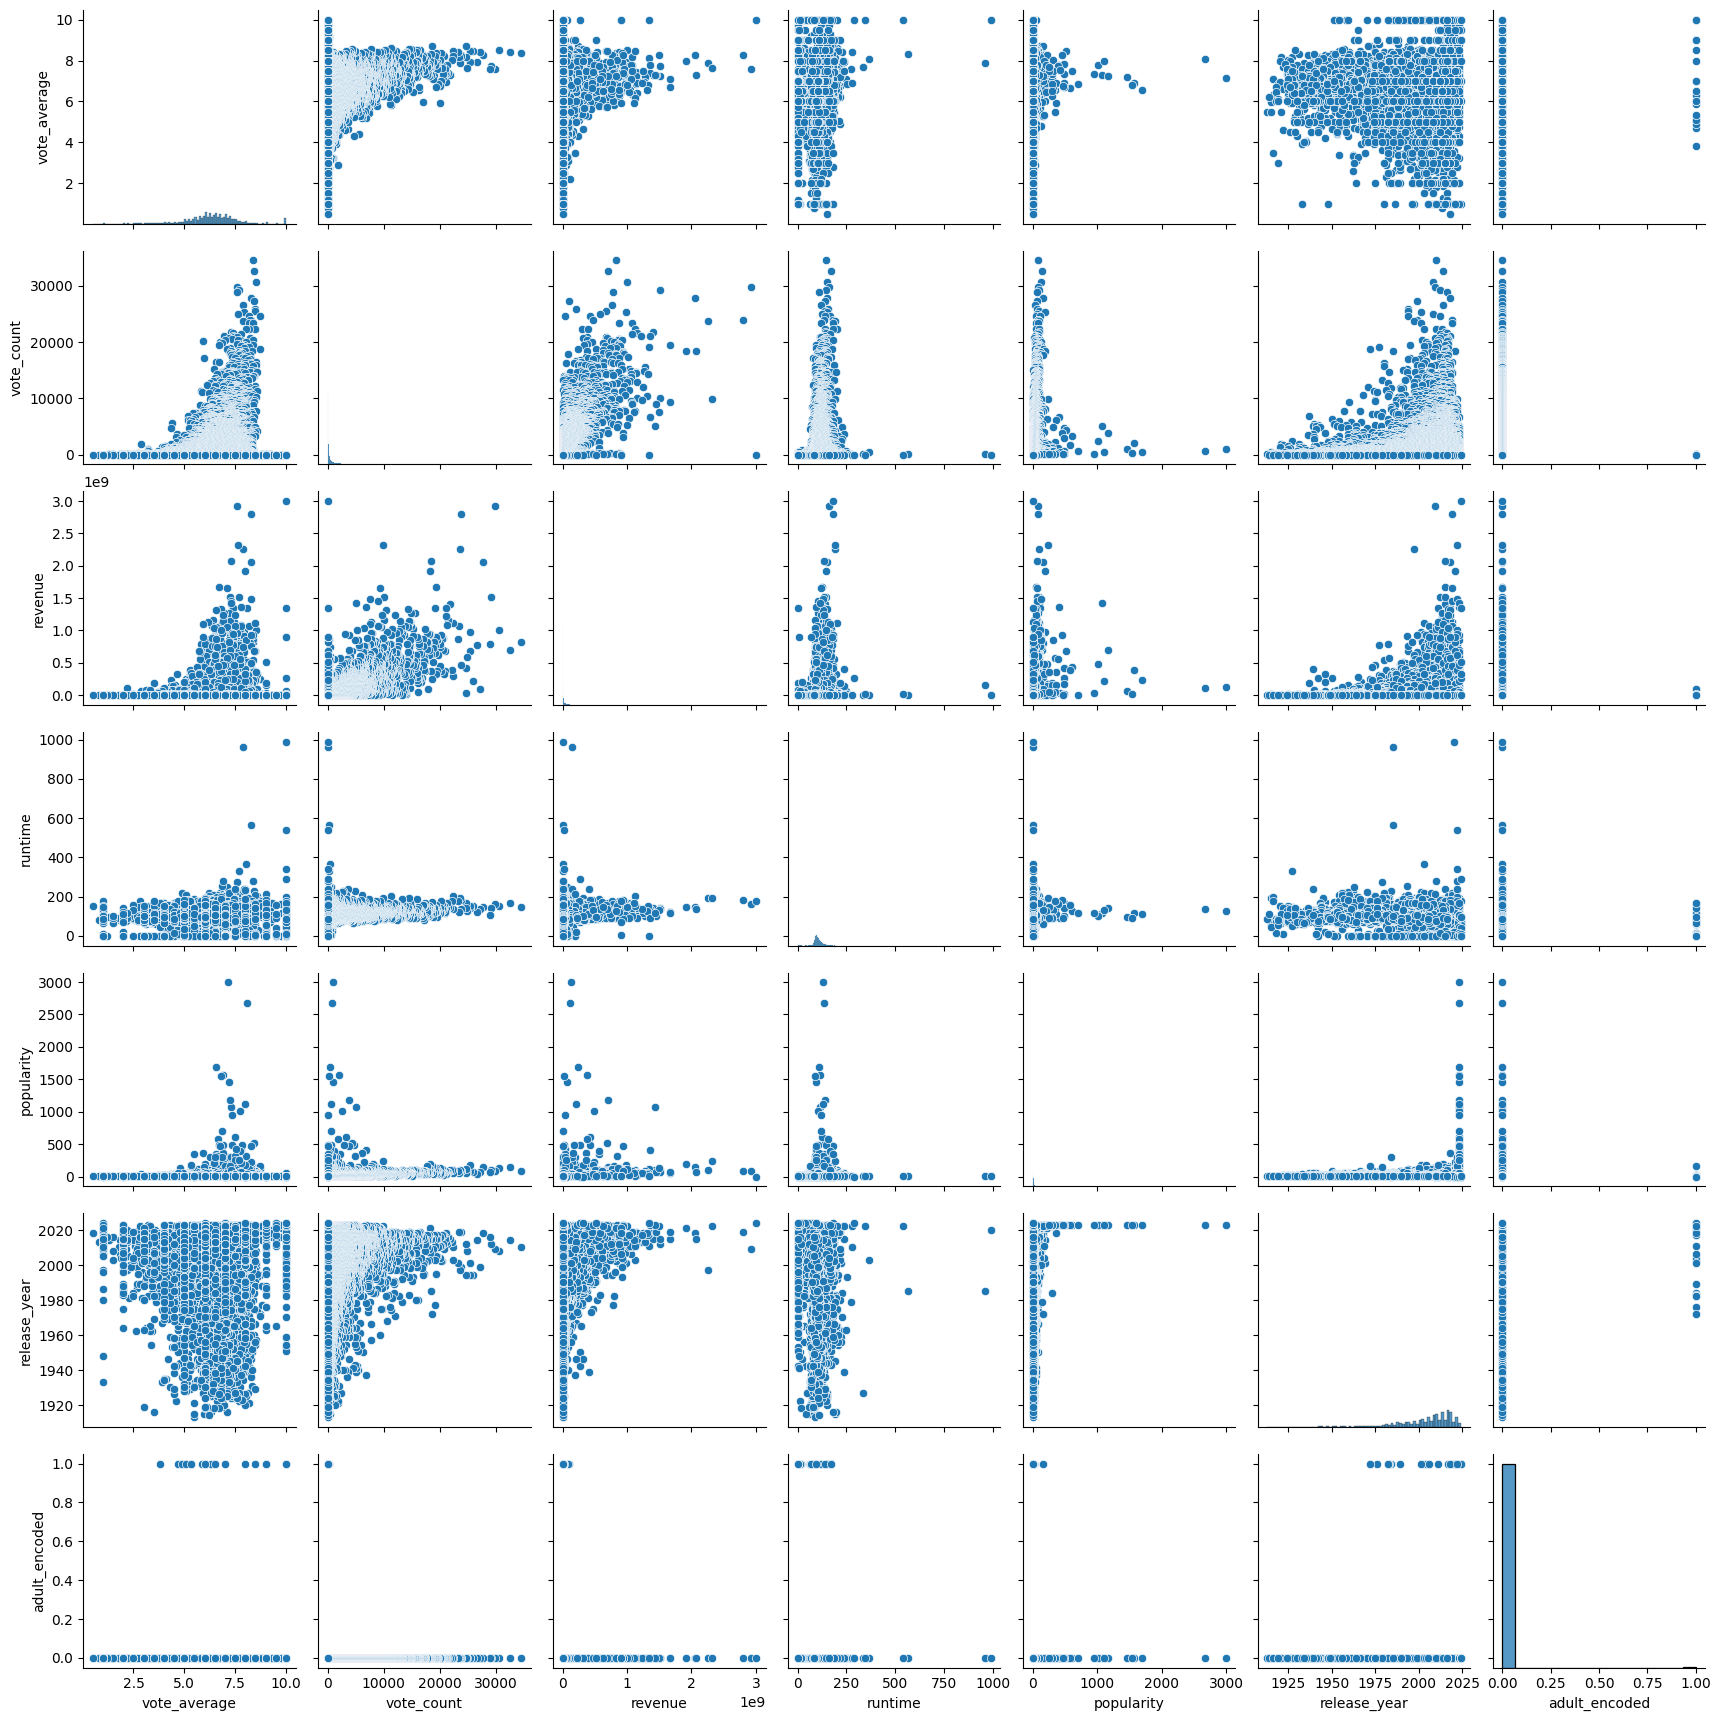

In [256]:
import seaborn as sns
sns.pairplot(data)

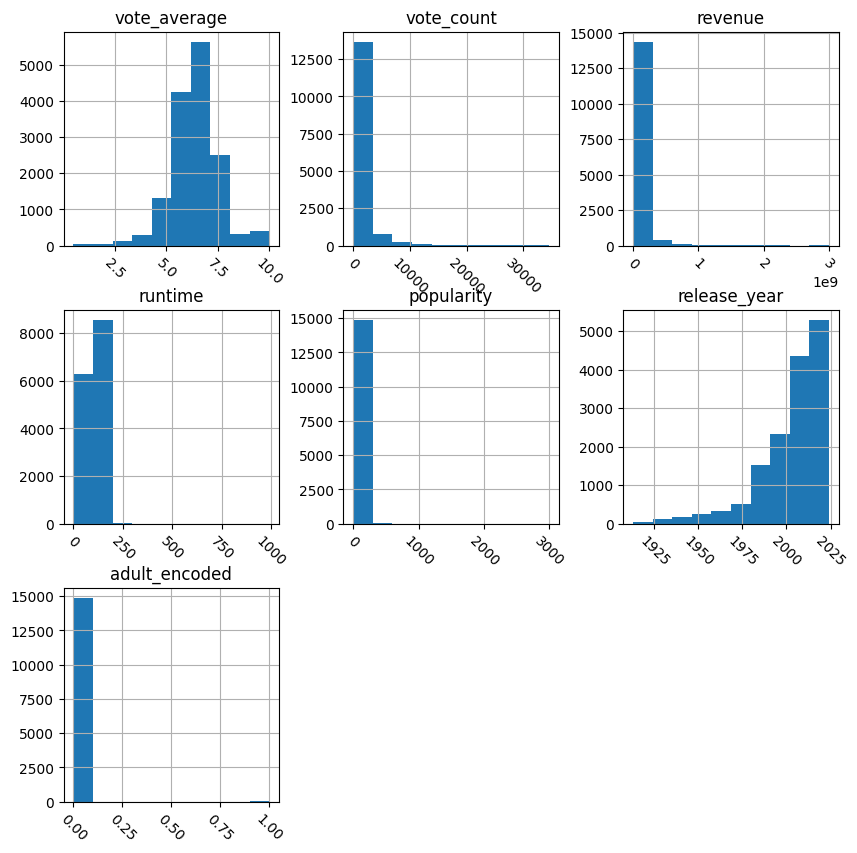

In [257]:
# Histogram grid
data.hist(figsize=(10,10), xrot=-45)

# Clear the text "residue"
plt.show()

Text(0.5, 1.0, 'Korolasyon Grafiği')

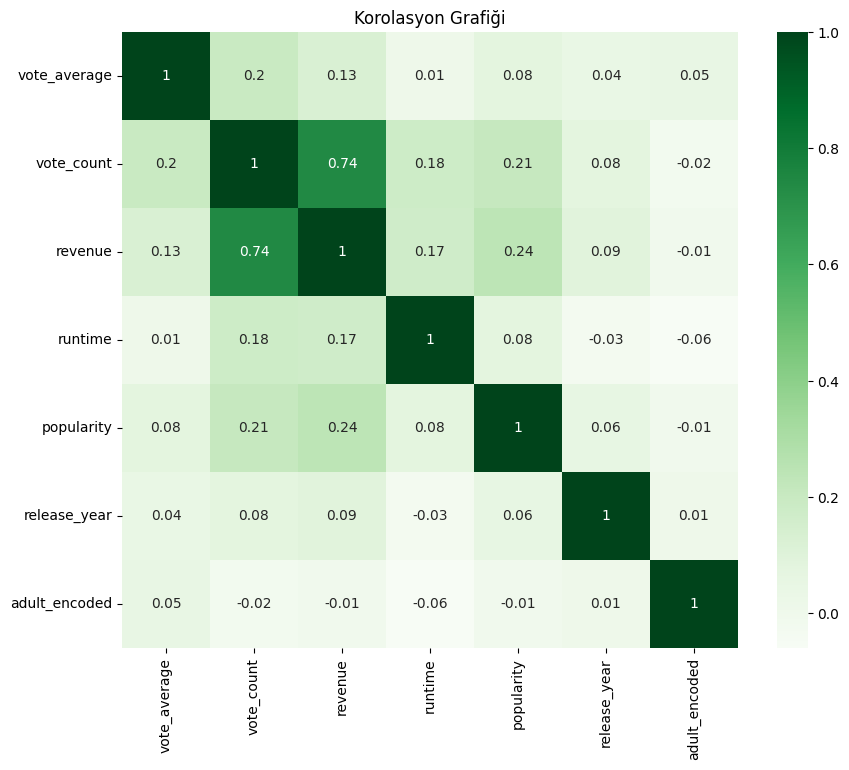

In [258]:
corr=data.corr(numeric_only=True)

plt.figure(figsize=(10,8))
_ = sns.heatmap(corr.round(2), cmap="Greens",  cbar=True, annot=True, square=True)
plt.title('Korolasyon Grafiği')

* data[' original_language'] özelliğini kategorikleştirme

In [259]:
# Binary Encoding
!pip install category_encoders==2.6.4
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols=['original_language'])
data_encoded = encoder.fit_transform(data)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


In [260]:
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols=['original_language'])
data_encoded = encoder.fit_transform(data)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


In [261]:
data_encoded.head()

,vote_average,vote_count,revenue,runtime,original_language_0,original_language_1,original_language_2,original_language_3,original_language_4,original_language_5,original_language_6,popularity,genres_split,production_companies_split,production_countries_split,release_year,adult_encoded
0,8.364,34495,825532764,148,0,0,0,0,0,0,1,83.952,"[Action, Science Fiction, Adventure]","[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]",2010,0
1,8.417,32571,701729206,169,0,0,0,0,0,0,1,140.241,"[Adventure, Drama, Science Fiction]","[Legendary Pictures, Syncopy, Lynda Obst Produ...","[United Kingdom, United States of America]",2014,0
2,8.512,30619,1004558444,152,0,0,0,0,0,0,1,130.643,"[Drama, Action, Crime, Thriller]","[DC Comics, Legendary Pictures, Syncopy, Isobe...","[United Kingdom, United States of America]",2008,0
3,7.573,29815,2923706026,162,0,0,0,0,0,0,1,79.932,"[Action, Adventure, Fantasy, Science Fiction]","[Dune Entertainment, Lightstorm Entertainment,...","[United States of America, United Kingdom]",2009,0
4,7.710,29166,1518815515,143,0,0,0,0,0,0,1,98.082,"[Science Fiction, Action, Adventure]",[Marvel Studios],[United States of America],2012,0


* data_encoded['genres_split'] değerini kategorikleştirme

In [262]:
#Toplam Benzersiz Tür sayısını öğrenme
all_genres = [genre for sublist in data_encoded['genres_split'] for genre in sublist]
unique_genres = set(all_genres)
num_unique_genres = len(unique_genres)
print("Toplam benzersiz tür sayısı:", num_unique_genres)


Toplam benzersiz tür sayısı: 19


In [263]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
encoded_genres = mlb.fit_transform(data['genres_split'])

# Kodlanmış türleri DataFrame'e dönüştürün
encoded_genres_df = pd.DataFrame(encoded_genres, columns=mlb.classes_)

# Kodlanmış türleri orijinal DataFrame'e ekleyin
data_encoded = pd.concat([data, encoded_genres_df], axis=1)

In [264]:
data_encoded.head()

,vote_average,vote_count,revenue,runtime,original_language,popularity,genres_split,production_companies_split,production_countries_split,release_year,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,8.364,34495.0,8.255328e+08,148.0,en,83.952,"[Action, Science Fiction, Adventure]","[Legendary Pictures, Syncopy, Warner Bros. Pic...","[United Kingdom, United States of America]",2010.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,8.417,32571.0,7.017292e+08,169.0,en,140.241,"[Adventure, Drama, Science Fiction]","[Legendary Pictures, Syncopy, Lynda Obst Produ...","[United Kingdom, United States of America]",2014.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,8.512,30619.0,1.004558e+09,152.0,en,130.643,"[Drama, Action, Crime, Thriller]","[DC Comics, Legendary Pictures, Syncopy, Isobe...","[United Kingdom, United States of America]",2008.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,7.573,29815.0,2.923706e+09,162.0,en,79.932,"[Action, Adventure, Fantasy, Science Fiction]","[Dune Entertainment, Lightstorm Entertainment,...","[United States of America, United Kingdom]",2009.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,7.710,29166.0,1.518816e+09,143.0,en,98.082,"[Science Fiction, Action, Adventure]",[Marvel Studios],[United States of America],2012.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


* data_encoded['production_countries_split'] değerini kategorikleştirme

In [265]:
mlb = MultiLabelBinarizer()
encoded_genres = mlb.fit_transform(data['production_countries_split'])

# Kodlanmış türleri DataFrame'e dönüştürün
encoded_genres_df = pd.DataFrame(encoded_genres, columns=mlb.classes_)

# Kodlanmış türleri orijinal DataFrame'e ekleyin
data_encoded = pd.concat([data, encoded_genres_df], axis=1)

In [266]:
data_encoded=data_encoded.drop(['production_companies_split','genres_split','production_countries_split','original_language'],axis=1)

In [267]:

# Standardize the 'revenue' ve 'vote_count' variable
scaler = StandardScaler()
data_encoded['revenue'] = scaler.fit_transform(data_encoded[['revenue']])
data_encoded['vote_count'] = scaler.fit_transform(data_encoded[['vote_count']])

In [268]:
data_encoded.head()

,vote_average,vote_count,revenue,runtime,popularity,release_year,adult_encoded,Afghanistan,Albania,Algeria,...,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Venezuela,Vietnam,Yemen,Yugoslavia,Zimbabwe
0,8.364,13.232105,5.768443,148.0,83.952,2010.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.417,12.470176,4.850324,169.0,140.241,2014.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.512,11.697159,7.096087,152.0,130.643,2008.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.573,11.378765,21.328366,162.0,79.932,2009.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.710,11.121752,10.909785,143.0,98.082,2012.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Korolasyon Grafiği')

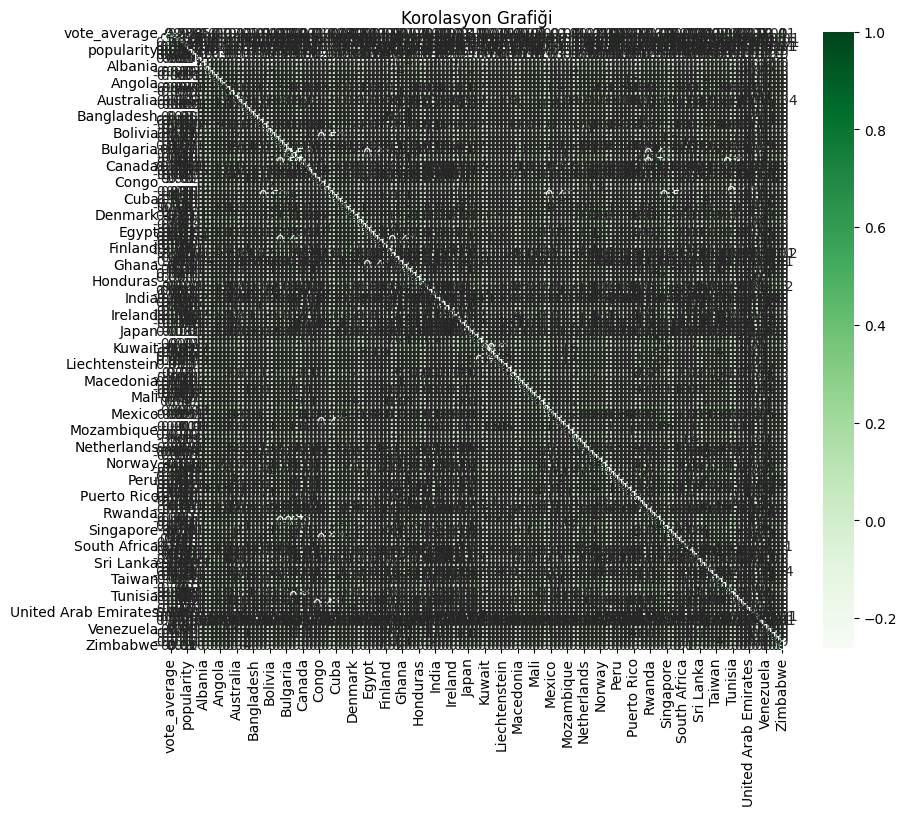

In [269]:
corr=data_encoded.corr(numeric_only=True)

plt.figure(figsize=(10,8))
_ = sns.heatmap(corr.round(2), cmap="Greens",  cbar=True, annot=True, square=True)
plt.title('Korolasyon Grafiği')

In [270]:
# Remove rows with any null values
data_encoded = data_encoded.dropna()

# Check for remaining null values
data_encoded.isnull().sum()


,0
vote_average,0
vote_count,0
revenue,0
runtime,0
popularity,0
release_year,0
adult_encoded,0
Afghanistan,0
Albania,0
Algeria,0


[Text(0.5, 1.0, 'vote_average')]

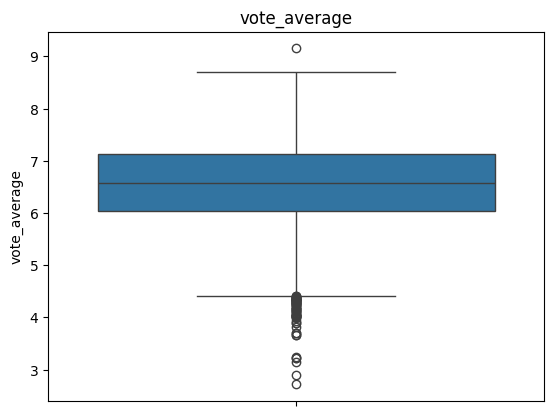

In [271]:
sns.boxplot(data_encoded['vote_average']).set(title='vote_average')

[Text(0.5, 1.0, 'popularity')]

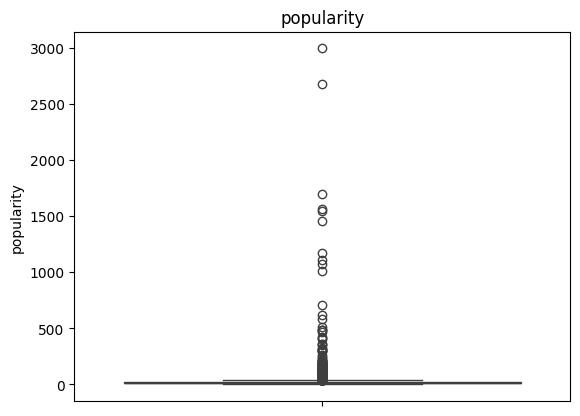

In [272]:
sns.boxplot(data_encoded['popularity']).set(title='popularity')

[Text(0.5, 1.0, 'release_year')]

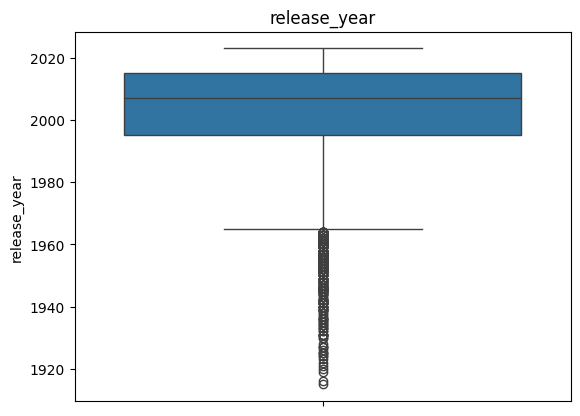

In [273]:
sns.boxplot(data_encoded['release_year']).set(title='release_year')

[Text(0.5, 1.0, 'revenue')]

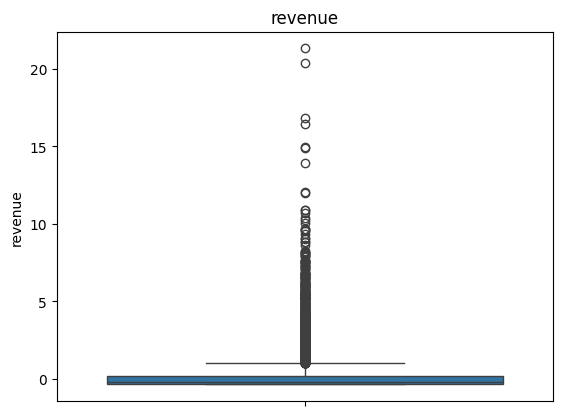

In [274]:
sns.boxplot(data_encoded['revenue']).set(title='revenue')

In [275]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8372 entries, 0 to 14903
Columns: 149 entries, vote_average to Zimbabwe
dtypes: float64(149)
memory usage: 9.6 MB


In [276]:
# Ensure X and y are derived from the same DataFrame
X = data_encoded.drop(['vote_average'], axis=1)
y = data_encoded['vote_average'] # Take y from data_encoded

# Standardize features
sc = StandardScaler()
X = sc.fit_transform(X)

# Now perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [277]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, display some predictions:
print("\nSome Predictions:")
for i in range(10):  # Print predictions for the first 10 samples
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {y_pred[i]:.2f}")

Mean Squared Error: 0.46058683697266617
R-squared: 0.22898950804981144

Some Predictions:
Actual: 5.81, Predicted: 6.59
Actual: 7.87, Predicted: 8.20
Actual: 6.88, Predicted: 6.55
Actual: 6.35, Predicted: 6.45
Actual: 6.06, Predicted: 6.12
Actual: 5.81, Predicted: 6.32
Actual: 6.41, Predicted: 6.75
Actual: 7.67, Predicted: 6.08
Actual: 5.16, Predicted: 6.01
Actual: 5.61, Predicted: 6.45


In [278]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Create a binary target variable
threshold = data_encoded['vote_average'].median()  # Choose a threshold (e.g., median)
data_encoded['vote_average_binary'] = (data_encoded['vote_average'] > threshold).astype(int)

# 2. Define features (X) and target (y)
X = data_encoded.drop(['vote_average', 'vote_average_binary'], axis=1)
y = data_encoded['vote_average_binary']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 4. Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"\nClassification Report:\n{report}")

Accuracy: 0.6561708288092652

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1387
           1       0.68      0.58      0.63      1376

    accuracy                           0.66      2763
   macro avg       0.66      0.66      0.65      2763
weighted avg       0.66      0.66      0.65      2763



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [279]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Define features (X) and target (y)
X = data_encoded.drop(['vote_average'], axis=1)
y = data_encoded['vote_average']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 3. Apply KMeans clustering to the training data
n_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)
train_clusters = kmeans.labels_

# 4. Build separate regression models for each cluster
models = {}
for cluster in range(n_clusters):
    cluster_data_indices = train_clusters == cluster
    X_cluster = X_train[cluster_data_indices]
    y_cluster = y_train[cluster_data_indices]
    model = LinearRegression()
    model.fit(X_cluster, y_cluster)
    models[cluster] = model

# 5. Predict on the test set using the appropriate cluster model
test_clusters = kmeans.predict(X_test)
y_pred = [models[cluster].predict(X_test.iloc[[i]])[0] for i, cluster in enumerate(test_clusters)]

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.19700236119979325
R-squared: 0.6702231257359719


In [280]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define features (X) and target (y)
X = data_encoded.drop(['vote_average'], axis=1)
y = data_encoded['vote_average']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 3. Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.17659112081574374
R-squared: 0.7043910159719525


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


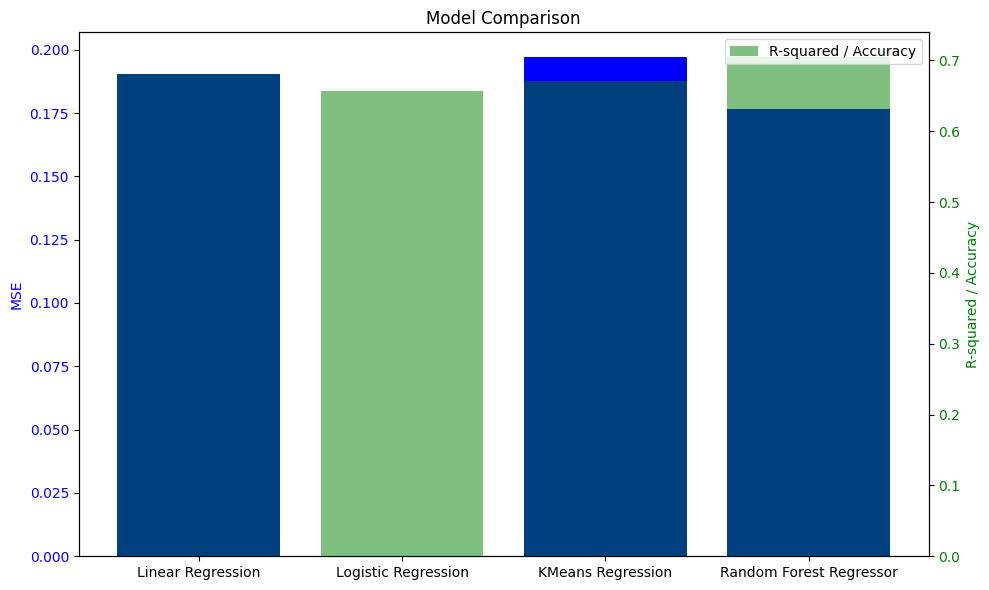

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Assuming you have already prepared your data_encoded DataFrame

# 1. Define features (X) and target (y)
X = data_encoded.drop(['vote_average'], axis=1)
y = data_encoded['vote_average']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# --- Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

# --- Logistic Regression (with binary target) ---
threshold = data_encoded['vote_average'].median()
data_encoded['vote_average_binary'] = (data_encoded['vote_average'] > threshold).astype(int)
X_logreg = data_encoded.drop(['vote_average', 'vote_average_binary'], axis=1)
y_logreg = data_encoded['vote_average_binary']
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(
    X_logreg, y_logreg, test_size=0.33, random_state=42
)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_logreg, y_train_logreg)
logistic_pred = logistic_model.predict(X_test_logreg)
logistic_accuracy = accuracy_score(y_test_logreg, logistic_pred)


# --- KMeans Regression ---
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)
train_clusters = kmeans.labels_
kmeans_models = {}
for cluster in range(n_clusters):
    cluster_data_indices = train_clusters == cluster
    X_cluster = X_train[cluster_data_indices]
    y_cluster = y_train[cluster_data_indices]
    model = LinearRegression()
    model.fit(X_cluster, y_cluster)
    kmeans_models[cluster] = model
test_clusters = kmeans.predict(X_test)
kmeans_pred = [kmeans_models[cluster].predict(X_test.iloc[[i]])[0] for i, cluster in enumerate(test_clusters)]
kmeans_mse = mean_squared_error(y_test, kmeans_pred)
kmeans_r2 = r2_score(y_test, kmeans_pred)

# --- Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# --- Create the bar chart ---
models = ['Linear Regression', 'Logistic Regression', 'KMeans Regression', 'Random Forest Regressor']
mse_scores = [linear_mse, 0, kmeans_mse, rf_mse]  # 0 for Logistic Regression as it uses accuracy
r2_scores = [linear_r2, logistic_accuracy, kmeans_r2, rf_r2]  # Logistic Regression uses accuracy

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(models, mse_scores, color='blue', label='MSE')
ax1.set_ylabel('MSE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.bar(models, r2_scores, color='green', label='R-squared / Accuracy', alpha=0.5)
ax2.set_ylabel('R-squared / Accuracy', color='green')
ax2.tick_params(axis='y', labelcolor='green')
#ax2.set_ylim(0, 1)
plt.title('Model Comparison')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

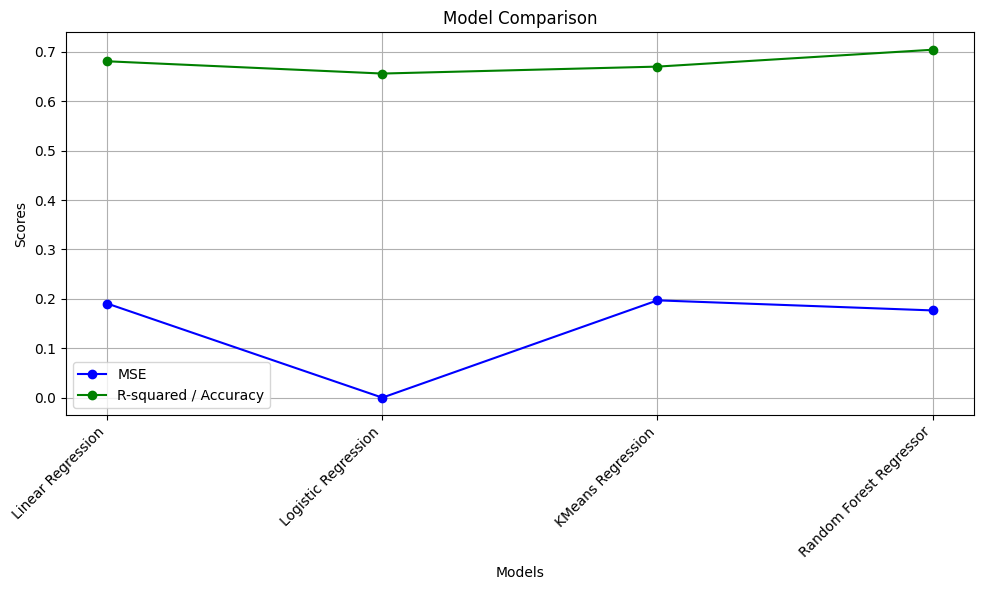

In [282]:
# --- Create the line chart ---
models = ['Linear Regression', 'Logistic Regression', 'KMeans Regression', 'Random Forest Regressor']
mse_scores = [linear_mse, 0, kmeans_mse, rf_mse]  # 0 for Logistic Regression
r2_scores = [linear_r2, logistic_accuracy, kmeans_r2, rf_r2]

plt.figure(figsize=(10, 6))
plt.plot(models, mse_scores, marker='o', label='MSE', color='blue')
plt.plot(models, r2_scores, marker='o', label='R-squared / Accuracy', color='green')
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Genel Yorum**

# 1) Random Forest Regressor (Rastgele Orman Regresörü):

Genellikle dört model arasında en iyi performansı gösterdi.
En düşük Ortalama Kare Hatası (MSE).
Verilere iyi bir uyum gösterdiğini belirten en yüksek R-kare değeri.

# 2) Linear Regression (Doğrusal Regresyon):

Orta düzeyde bir performans gösterdi.
Rastgele Orman'a kıyasla daha yüksek MSE.
Rastgele Orman'dan daha düşük R-kare değeri.

# 3) KMeans Regression (K-Ortalamalar Regresyonu):

Bu durumda Doğrusal Regresyon ve Rastgele Orman'dan daha kötü performans gösterdi.
Hem Doğrusal hem de Rastgele Orman'dan daha yüksek MSE ve daha düşük R-kare.
K-Ortalamalar regresyonunun performansı, veri kümesine ve küme sayısı seçimine güçlü bir şekilde bağlıdır, bu nedenle sonuçlar değişebilir.

# 4) Logistic Regression (Lojistik Regresyon):

MSE ve R-kare kullanılarak doğrudan karşılaştırılamasa da, orta düzeyde bir doğruluk puanına sahipti.
Lojistik regresyonun bir sınıflandırma problemi (ikili hedef) çözdüğünü, diğer modellerin ise regresyon (sürekli hedef) için olduğunu unutmayın.
Performans, seçilen eşiğin verileri iki sınıfa ne kadar iyi ayırdığı ile belirlenir.

# Ek:
Rastgele Orman Regresörü, en düşük MSE ve en yüksek R-kareye dayanarak veri kümenizdeki 'vote_average' değerini tahmin etmek için en iyi performans gösteren model olarak ortaya çıkıyor.
Doğrusal Regresyon, makul bir performansla iyi bir temel model sağlar.
K-Ortalamalar Regresyonu, bu belirli veri kümesi ve mevcut yapılandırma için en iyi seçim olmayabilir.
Lojistik Regresyon, bir sınıflandırma görevi gerçekleştirir ve performansının doğruluk, kesinlik, geri çağırma vb. gibi sınıflandırma ölçütlerine göre değerlendirilmesi gerekir.